# *part 1*
### Library Implementation, Initial Test and Validation (XOR Problem)

Training XOR...
Epoch 1/2000, Loss: 2.0003
Epoch 2/2000, Loss: 2.0002
Epoch 3/2000, Loss: 2.0002
Epoch 4/2000, Loss: 2.0002
Epoch 5/2000, Loss: 2.0002
Epoch 6/2000, Loss: 2.0001
Epoch 7/2000, Loss: 2.0001
Epoch 8/2000, Loss: 2.0001
Epoch 9/2000, Loss: 2.0001
Epoch 10/2000, Loss: 2.0001
Epoch 11/2000, Loss: 2.0001
Epoch 12/2000, Loss: 2.0001
Epoch 13/2000, Loss: 2.0001
Epoch 14/2000, Loss: 2.0001
Epoch 15/2000, Loss: 2.0001
Epoch 16/2000, Loss: 2.0001
Epoch 17/2000, Loss: 2.0001
Epoch 18/2000, Loss: 2.0001
Epoch 19/2000, Loss: 2.0001
Epoch 20/2000, Loss: 2.0001
Epoch 21/2000, Loss: 2.0001
Epoch 22/2000, Loss: 2.0001
Epoch 23/2000, Loss: 2.0001
Epoch 24/2000, Loss: 2.0001
Epoch 25/2000, Loss: 2.0001
Epoch 26/2000, Loss: 2.0001
Epoch 27/2000, Loss: 2.0001
Epoch 28/2000, Loss: 2.0001
Epoch 29/2000, Loss: 2.0001
Epoch 30/2000, Loss: 2.0001
Epoch 31/2000, Loss: 2.0000
Epoch 32/2000, Loss: 2.0000
Epoch 33/2000, Loss: 2.0000
Epoch 34/2000, Loss: 2.0000
Epoch 35/2000, Loss: 2.0000
Epoch 36/2000

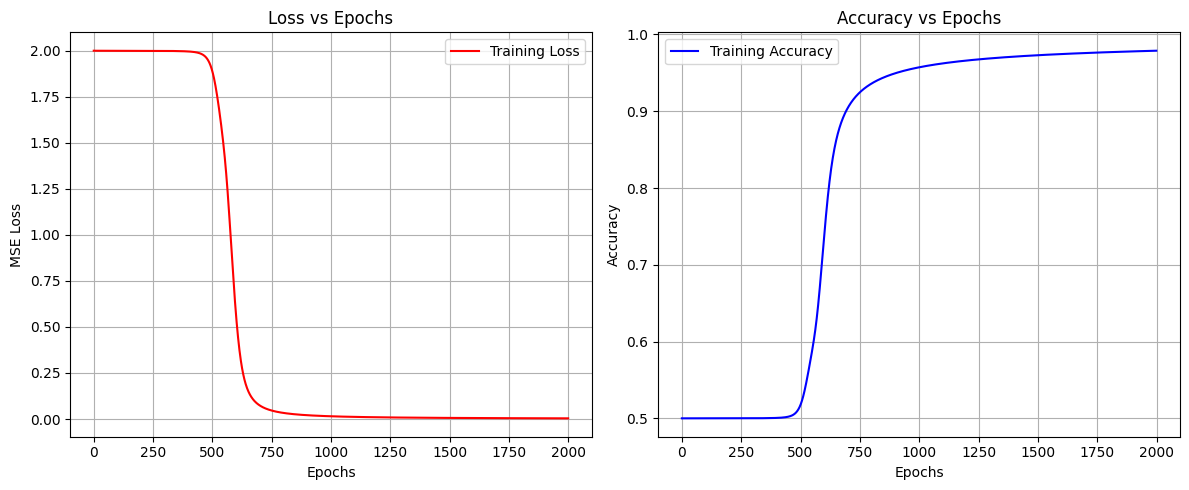

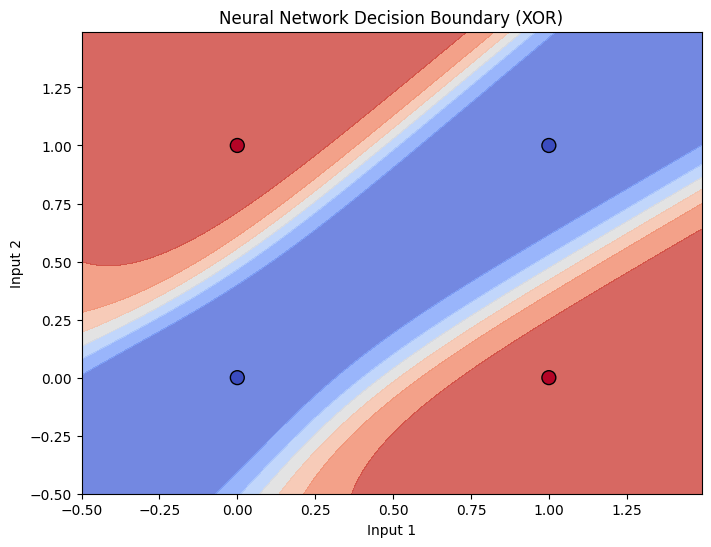


Final Predictions:
Input: [0 0], Pred: 0.0153, Rounded: 0
Input: [0 1], Pred: 0.9764, Rounded: 1
Input: [1 0], Pred: 0.9767, Rounded: 1
Input: [1 1], Pred: 0.0226, Rounded: 0


In [1]:
# Imports and Setup

import numpy as np
import sys
import os
import matplotlib.pyplot as plt 

# Ensure we can import from the lib folder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.layers import Dense
from lib.activations import Tanh, Sigmoid
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.training_history import plot_performance

def plot_decision_boundary(network, X, Y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions for the entire grid
    Z = network.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm') 
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolors='k', s=100, cmap='coolwarm')
    plt.title("Neural Network Decision Boundary (XOR)")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()


# Prepare Data (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Build Architecture 
net = Network()
net.add(Dense(2, 4))
net.add(Tanh())      
net.add(Dense(4, 1))
net.add(Sigmoid())   

# Setup Training 
net.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=1.0)

# Train
print("Training XOR...")
errors, accuracies = net.train(X, Y, epochs=2000, optimizer=optimizer)

# Plot Performance (Loss/Accuracy)
plot_performance(errors, accuracies)

# Plot Decision Boundary (THE NEW FEATURE)
plot_decision_boundary(net, X, Y)

# Verify Final Predictions
print("\nFinal Predictions:")
predictions = net.predict(X)
for x, p in zip(X, predictions):
    print(f"Input: {x}, Pred: {p[0]:.4f}, Rounded: {round(p[0])}")

### TensorFlow XOR Implementation, Initial Test and Validation (XOR Problem)

Training TensorFlow XOR Model...


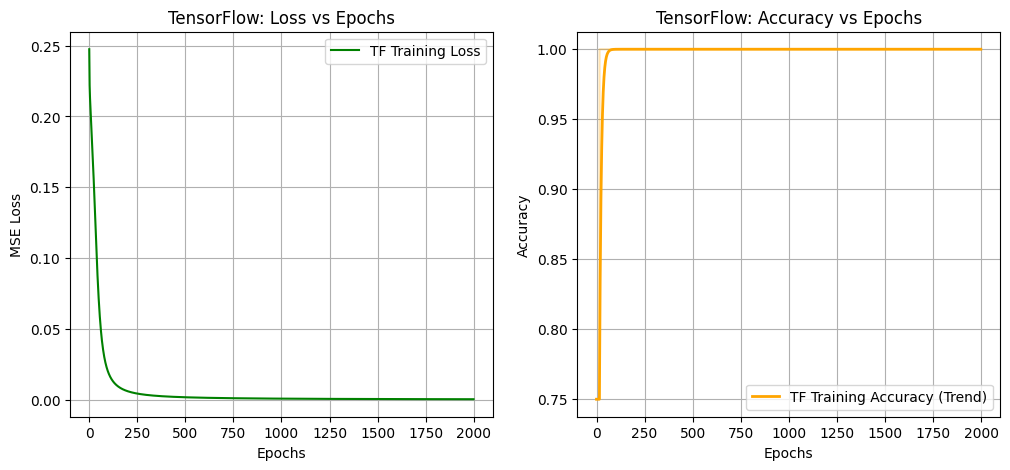


Final TensorFlow Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Input: [0. 0.], Pred: 0.0082, Rounded: 0
Input: [0. 1.], Pred: 0.9802, Rounded: 1
Input: [1. 0.], Pred: 0.9805, Rounded: 1
Input: [1. 1.], Pred: 0.0235, Rounded: 0


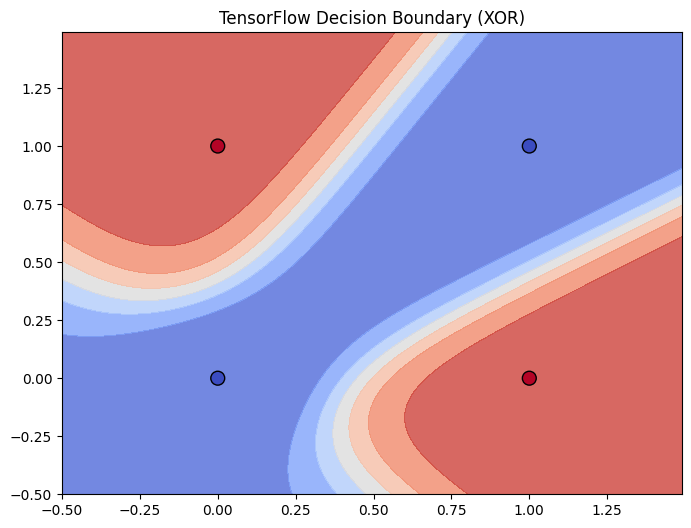

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Prepare Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Build the Model (Exact same architecture as your library)
model = Sequential([
    Dense(4, input_dim=2, activation='tanh'),  # Hidden Layer
    Dense(1, activation='sigmoid')             # Output Layer
])

# Compile
opt = SGD(learning_rate=1.0)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

# Train
print("Training TensorFlow XOR Model...")
history = model.fit(X, Y, epochs=2000, verbose=0)

# --- NEW: Smoothing Function ---
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting (Loss vs Epochs)
plt.figure(figsize=(12, 5))

# Loss Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='TF Training Loss', color='green')
plt.title('TensorFlow: Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.legend()

# Accuracy Graph (Now Smoothed!)
# We apply smooth_curve to the accuracy history
smooth_acc = smooth_curve(history.history['accuracy'])

plt.subplot(1, 2, 2)
# Plot the smooth line
plt.plot(smooth_acc, label='TF Training Accuracy (Trend)', color='orange', linewidth=2)
# Optional: Plot the original faint steps behind it for scientific honesty
plt.plot(history.history['accuracy'], color='orange', alpha=0.3) 

plt.title('TensorFlow: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

# Final Predictions
print("\nFinal TensorFlow Predictions:")
predictions = model.predict(X)
for x, p in zip(X, predictions):
    print(f"Input: {x}, Pred: {p[0]:.4f}, Rounded: {round(p[0])}")

# Decision Boundary (Visual Proof)
def plot_decision_boundary_tf(model, X, Y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict for the whole grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points, verbose=0)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), edgecolors='k', s=100, cmap='coolwarm')
    plt.title("TensorFlow Decision Boundary (XOR)")
    plt.show()

plot_decision_boundary_tf(model, X, Y)

# *part 2*
### Autoencoder & Latent Space Classification

MNIST Loaded: Train shape (5000, 784), Test shape (5000, 784)
Training Autoencoder...
--- Network Architecture Check ---
Layer 0: Weights (784, 128)
Layer 2: Weights (128, 64)
Layer 4: Weights (64, 128)
Layer 6: Weights (128, 784)
Epoch 1/50, Loss: 0.1327
Epoch 2/50, Loss: 0.0709
Epoch 3/50, Loss: 0.0672
Epoch 4/50, Loss: 0.0643
Epoch 5/50, Loss: 0.0612
Epoch 6/50, Loss: 0.0581
Epoch 7/50, Loss: 0.0552
Epoch 8/50, Loss: 0.0525
Epoch 9/50, Loss: 0.0500
Epoch 10/50, Loss: 0.0477
Epoch 11/50, Loss: 0.0457
Epoch 12/50, Loss: 0.0440
Epoch 13/50, Loss: 0.0424
Epoch 14/50, Loss: 0.0410
Epoch 15/50, Loss: 0.0397
Epoch 16/50, Loss: 0.0384
Epoch 17/50, Loss: 0.0372
Epoch 18/50, Loss: 0.0362
Epoch 19/50, Loss: 0.0351
Epoch 20/50, Loss: 0.0342
Epoch 21/50, Loss: 0.0334
Epoch 22/50, Loss: 0.0326
Epoch 23/50, Loss: 0.0319
Epoch 24/50, Loss: 0.0312
Epoch 25/50, Loss: 0.0305
Epoch 26/50, Loss: 0.0299
Epoch 27/50, Loss: 0.0294
Epoch 28/50, Loss: 0.0288
Epoch 29/50, Loss: 0.0283
Epoch 30/50, Loss: 0.027

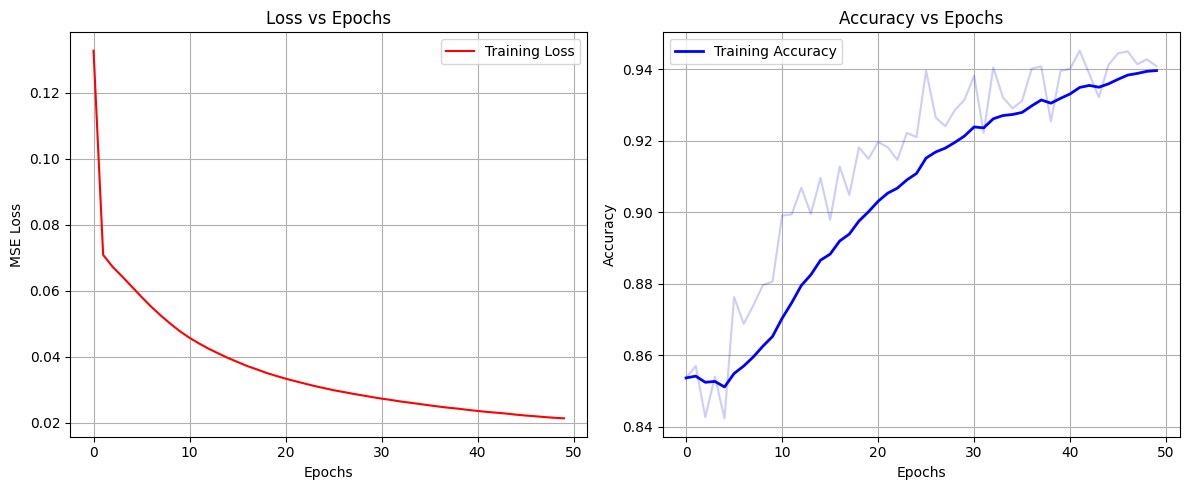

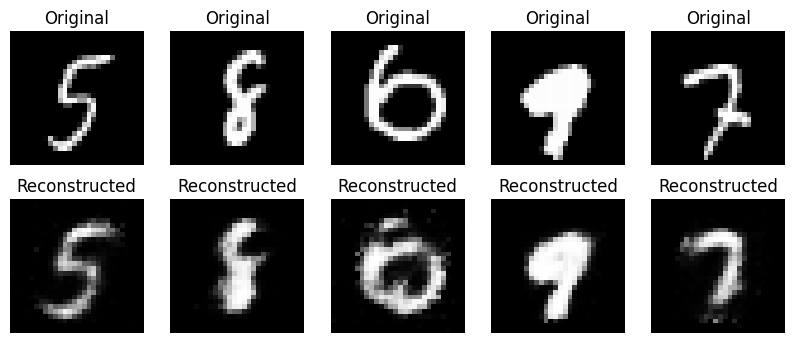

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# Ensure we can import from lib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.network import Network
from lib.encoder import build_encoder
from lib.decoder import build_decoder
from lib.losses import mse, mse_prime
from lib.optimizer import SGD
from lib.data_loader import load_mnist
from lib.training_history import plot_performance

# Load Data
# use a limit of 5000 images.
x_train, y_train, x_test, y_test = load_mnist(limit=5000)

# Build the Autoencoder
encoder = build_encoder(input_size=784, latent_size=64)
decoder = build_decoder(latent_size=64, output_size=784)

# stitch them together into one network
autoencoder = Network()
for layer in encoder.layers:
    autoencoder.add(layer)
for layer in decoder.layers:
    autoencoder.add(layer)

# Setup Training
autoencoder.use_loss(mse, mse_prime)
optimizer = SGD(learning_rate=1.0) 

# Train
print("Training Autoencoder...")

# Add this block before autoencoder.train(...)
print("--- Network Architecture Check ---")
for i, layer in enumerate(autoencoder.layers):
    if hasattr(layer, 'weights'):
        print(f"Layer {i}: Weights {layer.weights.shape}")
# Note: For Autoencoders, Input (x_train) is also the Target (x_train)
errors, accuracies = autoencoder.train(x_train, x_train, epochs=50, optimizer=optimizer, batch_size=32)

# Plot Loss Curve
plot_performance(errors, accuracies)

# Visualize Reconstruction
# Let's pick 5 random images from the test set
num_images = 5
indices = np.random.randint(0, len(x_test), num_images)
test_images = x_test[indices]

# Get reconstructions
reconstructed = autoencoder.predict(test_images)

# Plot Original vs Reconstructed
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

### the trained encoder as a feature extractor

 Extracting Features from Latent Space...
   Original Image Shape: (5000, 784) (784 pixels)
   Latent Feature Shape: (5000, 64) (64 features)
 Training SVM Classifier 
 Evaluating Performance 

 FINAL SVM ACCURACY: 89.64%


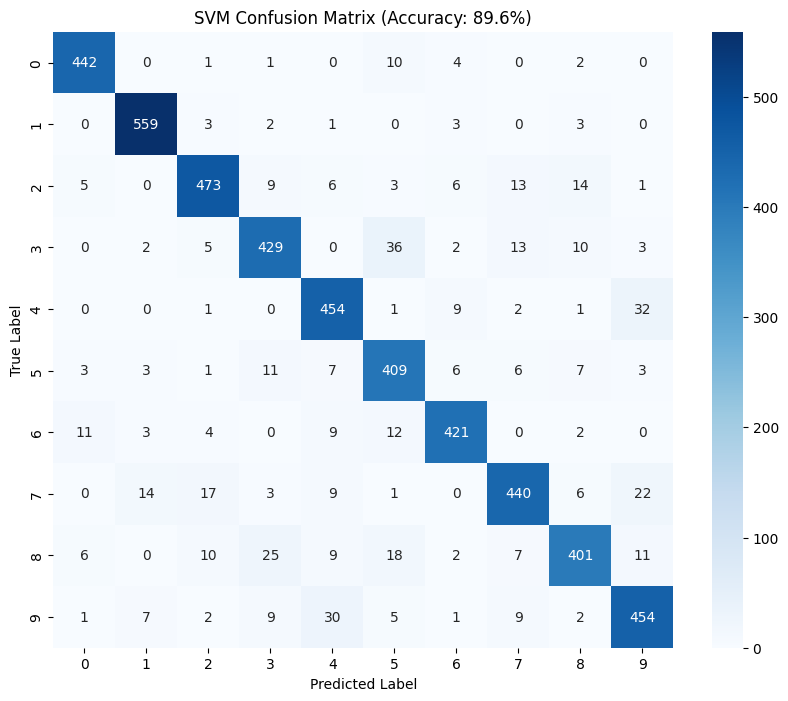


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       460
           1       0.95      0.98      0.96       571
           2       0.91      0.89      0.90       530
           3       0.88      0.86      0.87       500
           4       0.86      0.91      0.89       500
           5       0.83      0.90      0.86       456
           6       0.93      0.91      0.92       462
           7       0.90      0.86      0.88       512
           8       0.90      0.82      0.86       489
           9       0.86      0.87      0.87       520

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Extraction
# We feed the images into the TRAINED Encoder to get the 64-dimensional "Latent Code"
print(" Extracting Features from Latent Space...")
x_train_features = encoder.predict(x_train)
x_test_features  = encoder.predict(x_test)

print(f"   Original Image Shape: {x_train.shape} (784 pixels)")
print(f"   Latent Feature Shape: {x_train_features.shape} (64 features)")

# Train SVM
# We use the 'rbf' kernel, which is powerful for finding patterns in these features.
print(" Training SVM Classifier ")
svm = SVC(kernel='rbf', C=1.0)

# Ensure labels are 1D arrays (integers)
y_train_labels = y_train.astype(int)
y_test_labels  = y_test.astype(int)

# Fit the SVM on the features (not the raw pixels!)
svm.fit(x_train_features, y_train_labels)

# Evaluation
print(" Evaluating Performance ")
y_pred = svm.predict(x_test_features)

# Calculate Accuracy
final_accuracy = accuracy_score(y_test_labels, y_pred)
print(f"\n========================================")
print(f" FINAL SVM ACCURACY: {final_accuracy * 100:.2f}%")
print(f"========================================")

# Visualization (Confusion Matrix)
# This shows exactly which digits were confused with which.
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'SVM Confusion Matrix (Accuracy: {final_accuracy*100:.1f}%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

### make an autoencoder using tensorflow

Loading Data...
MNIST Loaded: Train shape (5000, 784), Test shape (5000, 784)

Starting TensorFlow Training...
Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 0.1428 - val_loss: 0.0683
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0697 - val_loss: 0.0667
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0683 - val_loss: 0.0659
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0667 - val_loss: 0.0643
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0645 - val_loss: 0.0614
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0612 - val_loss: 0.0584
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0580 - val_loss: 0.0562
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0555 - val_loss: 0.0539
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0534 - val_loss: 0.0518
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0516 - val_loss: 0.0507
Epoch 11/50
157/1

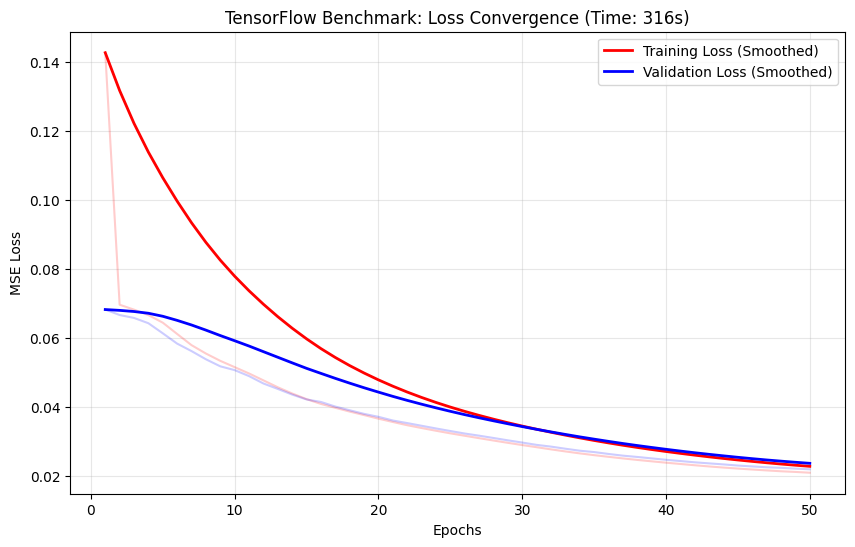

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step

Generating Visual Comparison...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


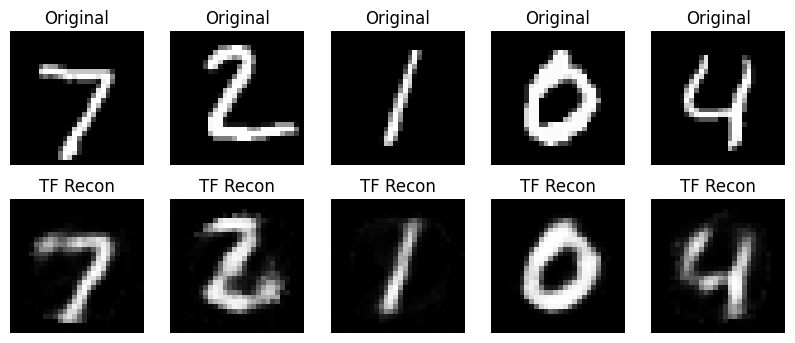

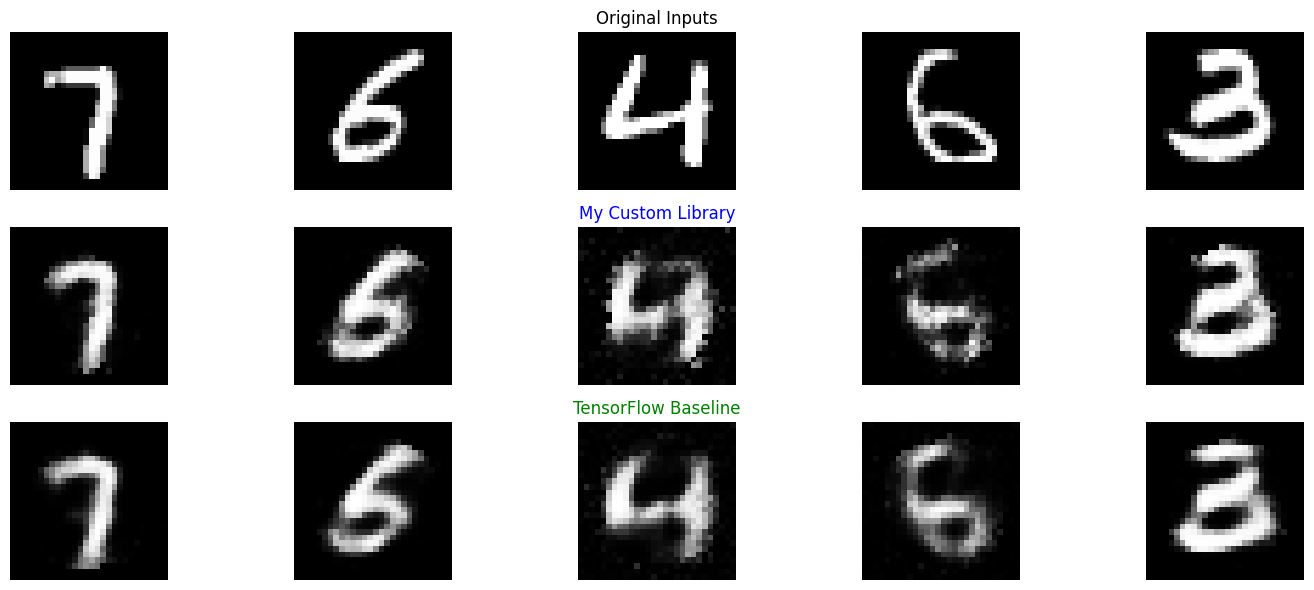

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import sys
import os

# Ensure lib is importable
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from lib.data_loader import load_mnist

# Load Data
print("Loading Data...")
x_train, y_train, x_test, y_test = load_mnist(limit=5000)

# Architecture (Exact match to custom lib)
def build_keras_autoencoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded) # Latent Space
    decoded = layers.Dense(128, activation='relu')(encoded)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(input_img, decoded)

keras_model = build_keras_autoencoder()

# Optimization
# We use SGD with Momentum 0.9 to match industry standards
opt = optimizers.SGD(learning_rate=0.1, momentum=0.9) 
keras_model.compile(optimizer=opt, loss='mse')

# Train with Measurement
print("\nStarting TensorFlow Training...")
start_time = time.time()

history = keras_model.fit(
    x_train, x_train,
    epochs=50, 
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

end_time = time.time()
tf_time = end_time - start_time
final_loss = history.history['loss'][-1]

print(f"\n[TensorFlow Benchmark Results]")
print(f"Training Time: {tf_time:.2f}s")
print(f"Final Loss:    {final_loss:.5f}")

# --- SMOOTHING & PLOTTING ---
def smooth_curve(points, factor=0.85):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

# Prepare data
loss = history.history['loss']
val_loss = history.history['val_loss']
smooth_loss = smooth_curve(loss)
smooth_val = smooth_curve(val_loss)
epochs = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, smooth_loss, 'r-', linewidth=2, label='Training Loss (Smoothed)')
plt.plot(epochs, loss, 'r-', alpha=0.2) # Faint original line
plt.plot(epochs, smooth_val, 'b-', linewidth=2, label='Validation Loss (Smoothed)')
plt.plot(epochs, val_loss, 'b-', alpha=0.2) # Faint original line

plt.title(f'TensorFlow Benchmark: Loss Convergence (Time: {tf_time:.0f}s)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- VISUAL COMPARISON ---
decoded_imgs = keras_model.predict(x_test[:5])
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("TF Recon")
    plt.axis('off')

# --- SIDE-BY-SIDE COMPARISON: CUSTOM VS TENSORFLOW ---

print("\nGenerating Visual Comparison...")

# Pick 5 random images from the test set
indices = np.random.randint(0, len(x_test), 5)
sample_images = x_test[indices]

# Get predictions from BOTH models
# Assumes 'autoencoder' is your custom model from Part 2
custom_reconstructions = autoencoder.predict(sample_images) 
tf_reconstructions = keras_model.predict(sample_images)

# Plot them together
plt.figure(figsize=(15, 6))

for i in range(5):
    # Row 1: Original Images
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 2: ax.set_title("Original Inputs", fontsize=12)
    
    # Row 2: Your Custom Library
    ax = plt.subplot(3, 5, i + 6)
    plt.imshow(custom_reconstructions[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 2: ax.set_title("My Custom Library", fontsize=12, color='blue')

    # Row 3: TensorFlow/Keras
    ax = plt.subplot(3, 5, i + 11)
    plt.imshow(tf_reconstructions[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 2: ax.set_title("TensorFlow Baseline", fontsize=12, color='green')

plt.tight_layout()
plt.show()